<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos/blob/main/Practica%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 5**

Con los links proporcionados, realizar un análisis y
manejo de datos nulos con herramientas de aprendizaje de máquina y aprendizaje
profundo. Detallar:
* Identificar el tipo de datos que están manejando.
* Revisar si pueden determinar distribución de datos nulos en columnas.
* Porque el método que eligieron es el adecuado para esos datos
* Si la decisión es de eliminar las columnas con datos nulos, dar explicación de
porque es la mejor opción.

*Importamos librerias necesarias*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos la base de datos

In [16]:
df = pd.read_csv('train.csv')

Primera haremos un analisis para ver si tenemos datos nulos en nuestra base de datos

In [17]:
df.isnull().tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,False,True,False


A simple vista observamos que la variable Age y Cabin, cuentan con valores nulo. Comprobaremos a continucion si son las unicas variables con valores nulos.

In [18]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

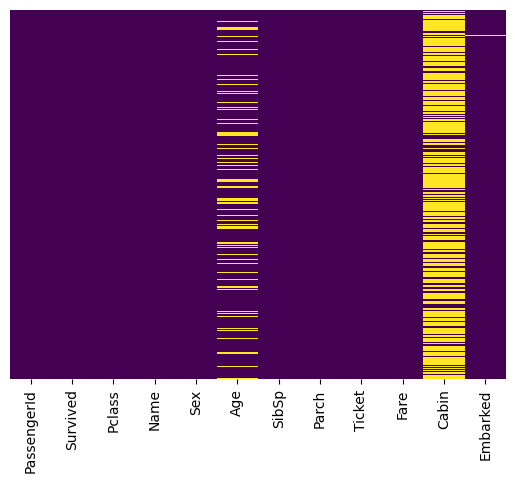

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observamos que la columna de Age, Cabin y Embarked son las que cuentan con valores Nulos y no cuentan con alguna distribucion.

Podemos eliminar la columna de Cabin y Embarked dado que no son variables representativas para nuestra regresion.

Eliminamos variables no representativas

In [20]:
df.drop(['Name','Embarked','SibSp','Ticket','Parch','Fare','Cabin'],axis=1,inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


Como la variable edad si es representativa en nuestra regresion, vamos a cambiar los valores nulos por el dato mas comun.

In [25]:
# Vamos a cambiar los Valores Nulos de Age por el dato más cómun

df.Age.fillna(method='bfill', inplace=True)
df.Age.isnull().sum().any()

False

In [26]:
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

<Axes: >

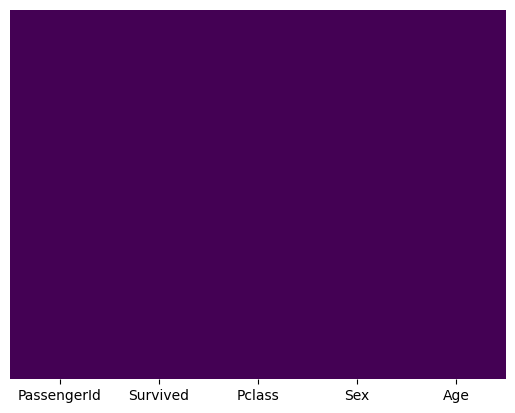

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observamos que ya no contamos con datos Nulos en nuestra variable Age

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


Ahora cambiaremos la variable Sex por valores numericos:
Masculino 1 - Femenino 0

In [29]:
sex_mapping = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

Convertimos la variables variables a valores numericos

In [30]:
df['Sex'] = df['Sex'].astype(int)

In [33]:
df['Age'] = df['Age'].astype(int)

Observamos que nuestra base de datos ya esta limpia

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22
1,2,1,1,0,38
2,3,1,3,0,26
3,4,1,1,0,35
4,5,0,3,1,35


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


Ahora contamos con una base de datos mas limpia con datos numericos y sin datos nulos.